In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ipl_batting_partnerships.csv")

In [4]:
data.head()

,index,team,player_1,player_2,score_1,score_2
0,0,Chennai Super Kings,AT Rayudu,SR Watson,7,0
1,1,Chennai Super Kings,AT Rayudu,SK Raina,12,19
2,2,Chennai Super Kings,AT Rayudu,KM Jadhav,9,9
3,3,Chennai Super Kings,RA Jadeja,KM Jadhav,6,4
4,19,Sunrisers Hyderabad,DA Warner,JM Bairstow,74,39


In [135]:
## No of teams 
data['team'].unique()

array(['Chennai Super Kings', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Delhi Capitals'], dtype=object)

Select a single team for better graphing and analysis.The following analysis can then be repeated to other teams.  

In [43]:
data_dc = data.copy()
data_dc = data_dc[data_dc['team'] == 'Delhi Capitals']
data_dc.head()

,index,team,player_1,player_2,score_1,score_2
17,32,Delhi Capitals,S Dhawan,PP Shaw,2,7
18,33,Delhi Capitals,S Dhawan,SS Iyer,2,16
19,34,Delhi Capitals,S Dhawan,CA Ingram,36,47
20,35,Delhi Capitals,S Dhawan,RR Pant,3,16
21,36,Delhi Capitals,KMA Paul,RR Pant,3,21


Score_1 and Score_2 stands for batting runs for each player in the partnership.  

For each pair of partnership , find the median runs for each player.

In [84]:
combined_data = data_dc.groupby(['player_1','player_2']).agg({'score_1': 'median' , 'score_2' : 'median'}).reset_index()
combined_data

,player_1,player_2,score_1,score_2
0,A Mishra,I Sharma,1.5,5.0
1,A Mishra,J Suchith,2.0,5.0
2,A Mishra,K Rabada,3.0,9.0
3,A Mishra,KMA Paul,1.0,1.0
4,A Mishra,RR Pant,0.0,6.0
5,A Mishra,TA Boult,6.0,3.5
6,AR Patel,KMA Paul,5.0,3.5
7,AR Patel,RR Pant,2.0,3.0
8,AR Patel,SE Rutherford,16.0,26.0
9,AR Patel,SS Iyer,5.0,3.0


In [85]:
combined_data[combined_data['player_1'] == 'S Dhawan']

,player_1,player_2,score_1,score_2
35,S Dhawan,AR Patel,3.0,1.0
36,S Dhawan,C Munro,1.5,10.5
37,S Dhawan,CA Ingram,4.0,14.0
38,S Dhawan,KMA Paul,1.0,0.0
39,S Dhawan,PP Shaw,13.0,11.0
40,S Dhawan,RR Pant,8.0,20.5
41,S Dhawan,SS Iyer,21.5,23.0


Compare the scores and assign each player as a 'Lead' if his score is more than the other player , or 'Follower' if score is less.  

In [100]:
combined_data['Lead'] = np.where(combined_data['score_1'] > combined_data['score_2'], combined_data['player_1'], combined_data['player_2'])

In [101]:
combined_data['Follower'] = np.where(combined_data['score_1'] < combined_data['score_2'], combined_data['player_1'], combined_data['player_2'])

In [88]:
combined_data.head()

,player_1,player_2,score_1,score_2,Lead,Follower
0,A Mishra,I Sharma,1.5,5.0,I Sharma,A Mishra
1,A Mishra,J Suchith,2.0,5.0,J Suchith,A Mishra
2,A Mishra,K Rabada,3.0,9.0,K Rabada,A Mishra
3,A Mishra,KMA Paul,1.0,1.0,KMA Paul,KMA Paul
4,A Mishra,RR Pant,0.0,6.0,RR Pant,A Mishra


Compute performance score : (sum of scores)/ (max of the two scores)  

In [89]:
def get_prf_score(row):
    sum_score = row['score_1'] + row['score_2']
    if (row['score_1'] > 0 ) | (row['score_2']> 0):
        
        if row['score_1'] >= row['score_2']:
            value = sum_score/row['score_1']
        else:
            value = sum_score/row['score_2']
    else:
        value = 0
    
        
        
    return value

combined_data['performance_score'] = combined_data[['score_1','score_2']].apply(lambda row : get_prf_score(row) , axis = 1)
combined_data['performance_score']

0     1.300000
1     1.400000
2     1.333333
3     2.000000
4     1.000000
5     1.583333
6     1.700000
7     1.666667
8     1.615385
9     1.600000
10    0.000000
11    1.500000
12    1.714286
13    1.357143
14    0.000000
15    1.444444
16    1.000000
17    1.500000
18    1.800000
19    1.200000
20    1.833333
21    1.444444
22    1.000000
23    1.800000
24    0.000000
25    0.000000
26    1.000000
27    1.000000
28    1.500000
29    1.000000
30    1.230769
31    2.000000
32    1.243243
33    1.600000
34    1.478261
35    1.333333
36    1.142857
37    1.285714
38    1.000000
39    1.846154
40    1.390244
41    1.934783
42    1.857143
43    2.000000
44    1.636364
45    1.500000
46    1.000000
Name: performance_score, dtype: float64

In [90]:
combined_data.head()

,player_1,player_2,score_1,score_2,Lead,Follower,performance_score
0,A Mishra,I Sharma,1.5,5.0,I Sharma,A Mishra,1.300000
1,A Mishra,J Suchith,2.0,5.0,J Suchith,A Mishra,1.400000
2,A Mishra,K Rabada,3.0,9.0,K Rabada,A Mishra,1.333333
3,A Mishra,KMA Paul,1.0,1.0,KMA Paul,KMA Paul,2.000000
4,A Mishra,RR Pant,0.0,6.0,RR Pant,A Mishra,1.000000


In [91]:
# construct graph
G = nx.from_pandas_edgelist(combined_data, "Follower", "Lead", ['performance_score'], create_using=nx.MultiDiGraph())


In [92]:
G.order() , G.size() ## nodes and edges 

(20, 47)

In [93]:
list(G.nodes())

['A Mishra',
 'I Sharma',
 'J Suchith',
 'K Rabada',
 'KMA Paul',
 'RR Pant',
 'TA Boult',
 'AR Patel',
 'SE Rutherford',
 'SS Iyer',
 'S Lamichhane',
 'C Munro',
 'PP Shaw',
 'CH Morris',
 'GH Vihari',
 'CA Ingram',
 'HV Patel',
 'Avesh Khan',
 'R Tewatia',
 'S Dhawan']

In [94]:
list(G.edges())

[('A Mishra', 'I Sharma'),
 ('A Mishra', 'J Suchith'),
 ('A Mishra', 'K Rabada'),
 ('A Mishra', 'RR Pant'),
 ('I Sharma', 'AR Patel'),
 ('K Rabada', 'K Rabada'),
 ('K Rabada', 'Avesh Khan'),
 ('KMA Paul', 'KMA Paul'),
 ('KMA Paul', 'AR Patel'),
 ('KMA Paul', 'RR Pant'),
 ('KMA Paul', 'S Dhawan'),
 ('RR Pant', 'C Munro'),
 ('RR Pant', 'CH Morris'),
 ('RR Pant', 'PP Shaw'),
 ('RR Pant', 'SE Rutherford'),
 ('RR Pant', 'SS Iyer'),
 ('TA Boult', 'A Mishra'),
 ('TA Boult', 'KMA Paul'),
 ('AR Patel', 'RR Pant'),
 ('AR Patel', 'SE Rutherford'),
 ('AR Patel', 'CH Morris'),
 ('AR Patel', 'K Rabada'),
 ('AR Patel', 'AR Patel'),
 ('AR Patel', 'S Dhawan'),
 ('SE Rutherford', 'CA Ingram'),
 ('SE Rutherford', 'SS Iyer'),
 ('SS Iyer', 'AR Patel'),
 ('SS Iyer', 'C Munro'),
 ('SS Iyer', 'J Suchith'),
 ('SS Iyer', 'R Tewatia'),
 ('S Lamichhane', 'S Lamichhane'),
 ('C Munro', 'PP Shaw'),
 ('PP Shaw', 'S Dhawan'),
 ('PP Shaw', 'PP Shaw'),
 ('CH Morris', 'CH Morris'),
 ('CH Morris', 'SS Iyer'),
 ('GH Vihari

Select top 10 batting partnership with maximum performance score , so that it can be highlighted in the graph.

In [110]:
edge_data = list(G.edges(data=True))
edge_data

[('A Mishra', 'I Sharma', {'performance_score': 1.3}),
 ('A Mishra', 'J Suchith', {'performance_score': 1.4}),
 ('A Mishra', 'K Rabada', {'performance_score': 1.3333333333333333}),
 ('A Mishra', 'RR Pant', {'performance_score': 1.0}),
 ('I Sharma', 'AR Patel', {'performance_score': 1.0}),
 ('K Rabada', 'K Rabada', {'performance_score': 0.0}),
 ('K Rabada', 'Avesh Khan', {'performance_score': 1.0}),
 ('KMA Paul', 'KMA Paul', {'performance_score': 2.0}),
 ('KMA Paul', 'AR Patel', {'performance_score': 1.7}),
 ('KMA Paul', 'RR Pant', {'performance_score': 1.2307692307692308}),
 ('KMA Paul', 'S Dhawan', {'performance_score': 1.0}),
 ('RR Pant', 'C Munro', {'performance_score': 1.7142857142857142}),
 ('RR Pant', 'CH Morris', {'performance_score': 1.0}),
 ('RR Pant', 'PP Shaw', {'performance_score': 1.4782608695652173}),
 ('RR Pant', 'SE Rutherford', {'performance_score': 1.8571428571428572}),
 ('RR Pant', 'SS Iyer', {'performance_score': 1.6363636363636365}),
 ('TA Boult', 'A Mishra', {'per

In [121]:
top_10_performance = sorted(edge_data , key = lambda x : x[2]['performance_score'] , reverse = True)[:10]
top_10_performance

[('KMA Paul', 'KMA Paul', {'performance_score': 2.0}),
 ('AR Patel', 'AR Patel', {'performance_score': 2.0}),
 ('PP Shaw', 'PP Shaw', {'performance_score': 2.0}),
 ('S Dhawan', 'SS Iyer', {'performance_score': 1.934782608695652}),
 ('RR Pant', 'SE Rutherford', {'performance_score': 1.8571428571428572}),
 ('PP Shaw', 'S Dhawan', {'performance_score': 1.8461538461538463}),
 ('CA Ingram', 'SS Iyer', {'performance_score': 1.8333333333333333}),
 ('CH Morris', 'SS Iyer', {'performance_score': 1.8}),
 ('CA Ingram', 'RR Pant', {'performance_score': 1.8}),
 ('RR Pant', 'C Munro', {'performance_score': 1.7142857142857142})]

In [122]:
top_10_edges = [(u,v) for u,v,w in top_10_performance]
top_10_edges

[('KMA Paul', 'KMA Paul'),
 ('AR Patel', 'AR Patel'),
 ('PP Shaw', 'PP Shaw'),
 ('S Dhawan', 'SS Iyer'),
 ('RR Pant', 'SE Rutherford'),
 ('PP Shaw', 'S Dhawan'),
 ('CA Ingram', 'SS Iyer'),
 ('CH Morris', 'SS Iyer'),
 ('CA Ingram', 'RR Pant'),
 ('RR Pant', 'C Munro')]

In [131]:
top_10_dict = {}
for u,v,w in top_10_performance:
    top_10_dict[(u,v)] = np.round(w['performance_score'],2)

In [132]:
top_10_dict

{('KMA Paul', 'KMA Paul'): 2.0,
 ('AR Patel', 'AR Patel'): 2.0,
 ('PP Shaw', 'PP Shaw'): 2.0,
 ('S Dhawan', 'SS Iyer'): 1.93,
 ('RR Pant', 'SE Rutherford'): 1.86,
 ('PP Shaw', 'S Dhawan'): 1.85,
 ('CA Ingram', 'SS Iyer'): 1.83,
 ('CH Morris', 'SS Iyer'): 1.8,
 ('CA Ingram', 'RR Pant'): 1.8,
 ('RR Pant', 'C Munro'): 1.71}

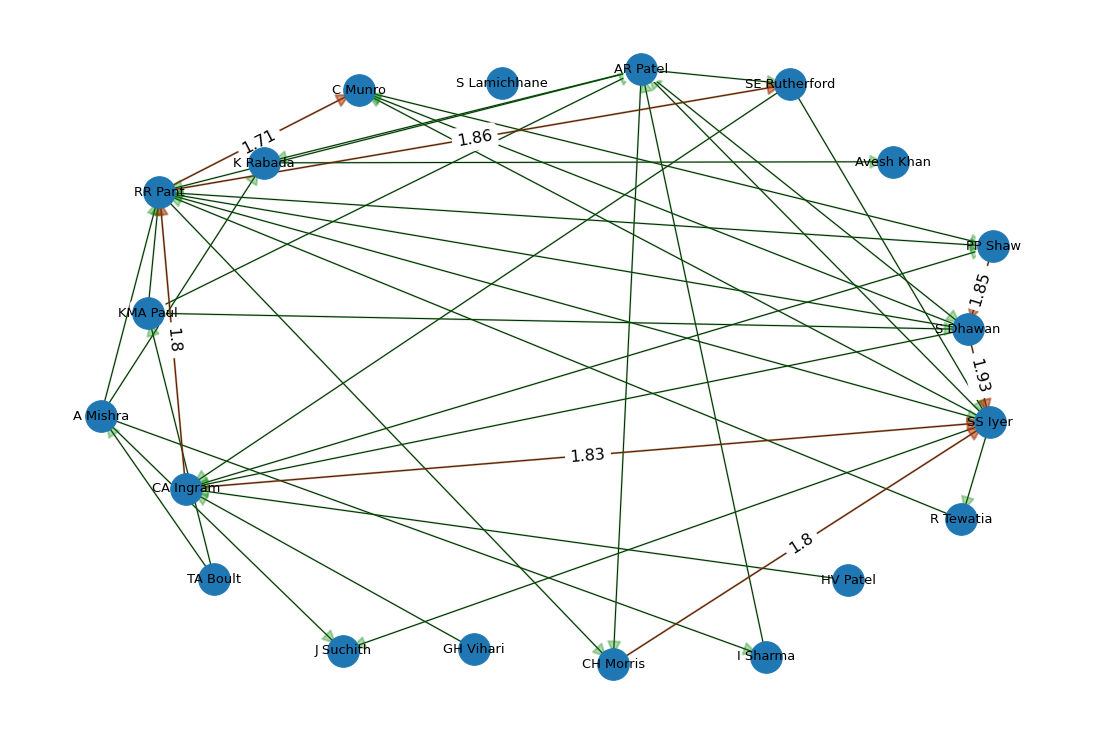

In [133]:
plt.figure(figsize = (15,10))
circ_pos = nx.spring_layout(G , k=20 , seed = 21) 

#Use the networkx draw function to easily visualise the graph
nx.draw(G,circ_pos)

#highlight the central airports and those in periphery 
nx.draw_networkx_nodes(G, circ_pos,  alpha=1, node_size = 1000)


# edges
nx.draw_networkx_edges(G,circ_pos,
                       edgelist=G.edges(),
                       width=2,alpha=0.3,edge_color='green',  arrowsize = 30) 
# edges
nx.draw_networkx_edges(G,circ_pos,
                       edgelist=top_10_edges,
                       width=2,alpha=0.3,edge_color='red',  arrowsize = 30) 


## node labels 
node_name={}
for node in G.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(G, circ_pos,node_name,font_size=13)

## edge labels 
nx.draw_networkx_edge_labels(G,circ_pos,font_size=16, edge_labels = top_10_dict)
plt.show()

In [97]:
## Batting partnership
list(G.degree())

[('A Mishra', 5),
 ('I Sharma', 2),
 ('J Suchith', 2),
 ('K Rabada', 5),
 ('KMA Paul', 6),
 ('RR Pant', 11),
 ('TA Boult', 2),
 ('AR Patel', 10),
 ('SE Rutherford', 4),
 ('SS Iyer', 9),
 ('S Lamichhane', 2),
 ('C Munro', 4),
 ('PP Shaw', 6),
 ('CH Morris', 5),
 ('GH Vihari', 3),
 ('CA Ingram', 7),
 ('HV Patel', 1),
 ('Avesh Khan', 1),
 ('R Tewatia', 2),
 ('S Dhawan', 7)]

In [98]:
## Maximum number of batting partnership

degree_list = list(G.degree())
sorted(degree_list , key = lambda x : x[1] , reverse = True)

[('RR Pant', 11),
 ('AR Patel', 10),
 ('SS Iyer', 9),
 ('CA Ingram', 7),
 ('S Dhawan', 7),
 ('KMA Paul', 6),
 ('PP Shaw', 6),
 ('A Mishra', 5),
 ('K Rabada', 5),
 ('CH Morris', 5),
 ('SE Rutherford', 4),
 ('C Munro', 4),
 ('GH Vihari', 3),
 ('I Sharma', 2),
 ('J Suchith', 2),
 ('TA Boult', 2),
 ('S Lamichhane', 2),
 ('R Tewatia', 2),
 ('HV Patel', 1),
 ('Avesh Khan', 1)]

In [99]:
sorted(G.in_degree , key = lambda x : x[1] , reverse = True)

[('RR Pant', 6),
 ('SS Iyer', 5),
 ('AR Patel', 4),
 ('PP Shaw', 4),
 ('CA Ingram', 4),
 ('K Rabada', 3),
 ('C Munro', 3),
 ('CH Morris', 3),
 ('S Dhawan', 3),
 ('J Suchith', 2),
 ('KMA Paul', 2),
 ('SE Rutherford', 2),
 ('A Mishra', 1),
 ('I Sharma', 1),
 ('S Lamichhane', 1),
 ('GH Vihari', 1),
 ('Avesh Khan', 1),
 ('R Tewatia', 1),
 ('TA Boult', 0),
 ('HV Patel', 0)]

Partnership with RR Pant and with RR Pant contributing to the batting score is 6, followed by SS Iyer at 5 winning partenrships.  

The data source and analysis guidance : https://www.analyticsvidhya.com/blog/2020/02/network-analysis-ipl-data/?utm_source=blog&utm_medium=introduction-graph-theory-applications-python